In [ ]:
#Description
## This dataset was used to demonstrate meaningful predictive power for a company within the healthcare sector.  The data outlines total fees collected from American Express transactions completed at one of the facilities.  A weather data project that I found on YouTube provided a template to follow so it helped.  I modeled my data after that.  Enjoy!

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# ---> Template from exercise weather = pd.read_csv("weather.csv", index_col="DATE")

In [9]:
amex = pd.read_csv("Project 4_v2.csv")
amex.head()

,Practice Id,MID,Date,Dba (Dim Mid),Fee Category,Rate Percent,Rate Amount,MOP___,Total Fees
0,1234,7205989,12/14/2015,Clinic 1,Interchange,0.0185,$0.10,AmEx,$484.49
1,1234,7205989,12/15/2015,Clinic 1,Interchange,0.0155,$0.10,AmEx,$279.45
2,1234,7205989,12/16/2015,Clinic 1,Interchange,0.0230,$0.10,AmEx,$254.02
3,1234,7205989,12/17/2015,Clinic 1,Interchange,0.0170,$0.10,AmEx,$1.46
4,1234,7205989,12/18/2015,Clinic 1,Interchange,0.0135,$0.10,AmEx,$0.37


In [10]:
amex.dtypes

Practice Id        int64
MID                int64
Date              object
Dba (Dim Mid)     object
Fee Category      object
Rate Percent     float64
Rate Amount       object
MOP___            object
Total Fees        object
dtype: object

In [11]:
# converting date to a datetime object

amex['Date'] = pd.to_datetime(amex['Date'])
amex.dtypes

Practice Id               int64
MID                       int64
Date             datetime64[ns]
Dba (Dim Mid)            object
Fee Category             object
Rate Percent            float64
Rate Amount              object
MOP___                   object
Total Fees               object
dtype: object

In [12]:
# setting date as the index
amex.set_index('Date', inplace =True)
amex

,Practice Id,MID,Dba (Dim Mid),Fee Category,Rate Percent,Rate Amount,MOP___,Total Fees
Date,,,,,,,,
2015-12-14,1234,7205989,Clinic 1,Interchange,0.0185,$0.10,AmEx,$484.49
2015-12-15,1234,7205989,Clinic 1,Interchange,0.0155,$0.10,AmEx,$279.45
2015-12-16,1234,7205989,Clinic 1,Interchange,0.0230,$0.10,AmEx,$254.02
2015-12-17,1234,7205989,Clinic 1,Interchange,0.0170,$0.10,AmEx,$1.46
2015-12-18,1234,7205989,Clinic 1,Interchange,0.0135,$0.10,AmEx,$0.37
...,...,...,...,...,...,...,...,...
2023-09-26,1234,7205989,Clinic 1,Interchange,0.0000,$0.00,AmEx,$0.21
2023-09-27,1234,7205989,Clinic 1,Interchange,0.0000,$0.00,AmEx,$0.77
2023-09-28,1234,7205989,Clinic 1,Interchange,0.0000,$0.00,AmEx,$7.77


In [13]:
#checking if we ahve nulls

amex.isna().sum()

Practice Id      0
MID              0
Dba (Dim Mid)    0
Fee Category     0
Rate Percent     0
Rate Amount      0
MOP___           0
Total Fees       0
dtype: int64

In [14]:
amex.columns = ['practice_id', 'mid', 'dba','fee_category','rate_percent','rate_amount','mop','total_fees']


In [15]:
amex['rate_amount'] = amex['rate_amount'].str.replace('$',"", regex=False)
amex['rate_amount'] = amex['rate_amount'].astype('float64')
amex['rate_amount'] 

Date
2015-12-14    0.1
2015-12-15    0.1
2015-12-16    0.1
2015-12-17    0.1
2015-12-18    0.1
             ... 
2023-09-26    0.0
2023-09-27    0.0
2023-09-28    0.0
2023-09-29    0.0
2023-09-30    0.0
Name: rate_amount, Length: 2848, dtype: float64

In [16]:
amex['total_fees'] = amex['total_fees'].str.replace('$',"", regex=False)
amex['total_fees'] = amex['total_fees'].str.replace(',',"", regex=False)
amex['total_fees'] = amex['total_fees'].astype('float64')
amex['total_fees'] 

Date
2015-12-14    484.49
2015-12-15    279.45
2015-12-16    254.02
2015-12-17      1.46
2015-12-18      0.37
               ...  
2023-09-26      0.21
2023-09-27      0.77
2023-09-28      7.77
2023-09-29      4.13
2023-09-30     30.69
Name: total_fees, Length: 2848, dtype: float64

In [17]:
amex.dtypes

practice_id       int64
mid               int64
dba              object
fee_category     object
rate_percent    float64
rate_amount     float64
mop              object
total_fees      float64
dtype: object

<Axes: xlabel='Date'>

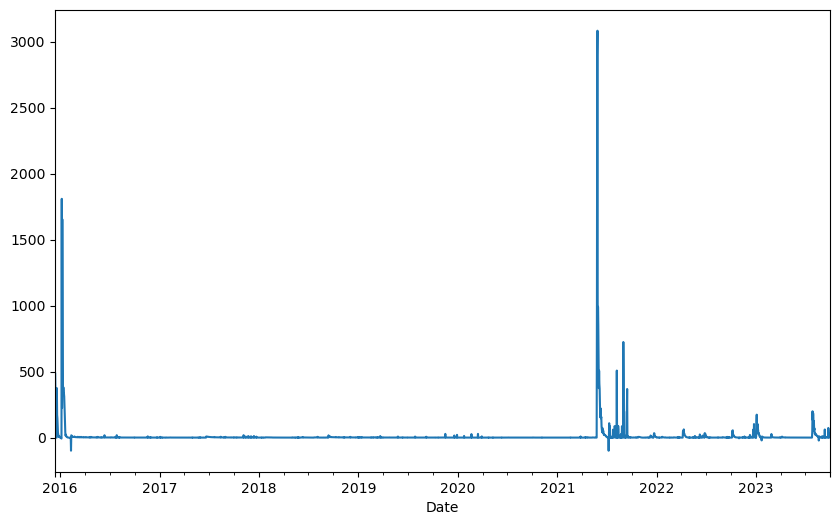

In [18]:
# plotting variation in total fees

plt.figure(figsize=(10,6))
amex["total_fees"].plot()

In [19]:
# setting the target variable (shfited version of total fees)

amex["target"] = amex.shift(-14)["total_fees"] # try out -1
amex.head()

,practice_id,mid,dba,fee_category,rate_percent,rate_amount,mop,total_fees,target
Date,,,,,,,,,
2015-12-14,1234,7205989,Clinic 1,Interchange,0.0185,0.1,AmEx,484.49,7.59
2015-12-15,1234,7205989,Clinic 1,Interchange,0.0155,0.1,AmEx,279.45,5.58
2015-12-16,1234,7205989,Clinic 1,Interchange,0.0230,0.1,AmEx,254.02,7.40
2015-12-17,1234,7205989,Clinic 1,Interchange,0.0170,0.1,AmEx,1.46,1.97
2015-12-18,1234,7205989,Clinic 1,Interchange,0.0135,0.1,AmEx,0.37,2.85


In [20]:
amex.tail()

,practice_id,mid,dba,fee_category,rate_percent,rate_amount,mop,total_fees,target
Date,,,,,,,,,
2023-09-26,1234,7205989,Clinic 1,Interchange,0.0,0.0,AmEx,0.21,NaN
2023-09-27,1234,7205989,Clinic 1,Interchange,0.0,0.0,AmEx,0.77,NaN
2023-09-28,1234,7205989,Clinic 1,Interchange,0.0,0.0,AmEx,7.77,NaN
2023-09-29,1234,7205989,Clinic 1,Interchange,0.0,0.0,AmEx,4.13,NaN
2023-09-30,1234,7205989,Clinic 1,Interchange,0.0,0.0,AmEx,30.69,NaN


In [21]:
amex = amex.ffill()
amex

,practice_id,mid,dba,fee_category,rate_percent,rate_amount,mop,total_fees,target
Date,,,,,,,,,
2015-12-14,1234,7205989,Clinic 1,Interchange,0.0185,0.1,AmEx,484.49,7.59
2015-12-15,1234,7205989,Clinic 1,Interchange,0.0155,0.1,AmEx,279.45,5.58
2015-12-16,1234,7205989,Clinic 1,Interchange,0.0230,0.1,AmEx,254.02,7.40
2015-12-17,1234,7205989,Clinic 1,Interchange,0.0170,0.1,AmEx,1.46,1.97
2015-12-18,1234,7205989,Clinic 1,Interchange,0.0135,0.1,AmEx,0.37,2.85
...,...,...,...,...,...,...,...,...,...
2023-09-26,1234,7205989,Clinic 1,Interchange,0.0000,0.0,AmEx,0.21,30.69
2023-09-27,1234,7205989,Clinic 1,Interchange,0.0000,0.0,AmEx,0.77,30.69
2023-09-28,1234,7205989,Clinic 1,Interchange,0.0000,0.0,AmEx,7.77,30.69


In [22]:
# checking multi-colieanarity

amex.corr()

C:\Users\rontr\AppData\Local\Temp\ipykernel_11064\2100267093.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  amex.corr()


,practice_id,mid,rate_percent,rate_amount,total_fees,target
practice_id,NaN,NaN,NaN,NaN,NaN,NaN
mid,NaN,NaN,NaN,NaN,NaN,NaN
rate_percent,NaN,NaN,1.000000,0.086190,0.025323,0.026606
rate_amount,NaN,NaN,0.086190,1.000000,0.301077,0.076056
total_fees,NaN,NaN,0.025323,0.301077,1.000000,0.052275
target,NaN,NaN,0.026606,0.076056,0.052275,1.000000


In [23]:
from sklearn.linear_model import Ridge # similar linear regression

rr = Ridge(alpha=.1)

In [24]:
predictors = amex.columns[~amex.columns.isin(["target", "practice_id", "mid", 'dba', 'fee_category', 'mop'])]
predictors

Index(['rate_percent', 'rate_amount', 'total_fees'], dtype='object')

In [25]:
def backtest(amex, model, predictors, start=1825, step=90):
    all_predictions = []
    #print(amex.shape[0])
    for i in range(start, amex.shape[0], step):
        train = amex.iloc[:i,:]
        test = amex.iloc[i:(i+step),:]
        
        model.fit(train[predictors], train["target"])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        #print(combined)
        all_predictions.append(combined)
        
    return pd.concat(all_predictions)

In [26]:
predictions = backtest(amex, rr, predictors)

In [27]:
predictions

,actual,prediction,diff
Date,,,
2020-12-12,0.26,1.507410,1.247410
2020-12-13,0.26,1.466406,1.206406
2020-12-14,0.26,1.318717,1.058717
2020-12-15,1.30,1.522343,0.222343
2020-12-16,0.26,1.523189,1.263189
...,...,...,...
2023-09-26,30.69,7.400928,23.289072
2023-09-27,30.69,7.419098,23.270902
2023-09-28,30.69,7.646222,23.043778


In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(predictions["actual"], predictions["prediction"])

34.94938626845538

In [29]:
def pct_diff(old, new):
    return (new - old) / old

def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"
    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather
    
rolling_horizons = [3, 7, 14] # experiement with to see if teh mean absolute error imrpocves MAR = 39
for horizon in rolling_horizons:
    for col in ["rate_percent", "rate_amount"]:
        amex = compute_rolling(amex, horizon, col)

In [30]:
amex

,practice_id,mid,dba,fee_category,rate_percent,rate_amount,mop,total_fees,target,rolling_3_rate_percent,...,rolling_3_rate_amount,rolling_3_rate_amount_pct,rolling_7_rate_percent,rolling_7_rate_percent_pct,rolling_7_rate_amount,rolling_7_rate_amount_pct,rolling_14_rate_percent,rolling_14_rate_percent_pct,rolling_14_rate_amount,rolling_14_rate_amount_pct
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-14,1234,7205989,Clinic 1,Interchange,0.0185,0.1,AmEx,484.49,7.59,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-15,1234,7205989,Clinic 1,Interchange,0.0155,0.1,AmEx,279.45,5.58,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-16,1234,7205989,Clinic 1,Interchange,0.0230,0.1,AmEx,254.02,7.40,0.019000,...,0.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-17,1234,7205989,Clinic 1,Interchange,0.0170,0.1,AmEx,1.46,1.97,0.018500,...,0.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-18,1234,7205989,Clinic 1,Interchange,0.0135,0.1,AmEx,0.37,2.85,0.017833,...,0.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-26,1234,7205989,Clinic 1,Interchange,0.0000,0.0,AmEx,0.21,30.69,0.000000,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
2023-09-27,1234,7205989,Clinic 1,Interchange,0.0000,0.0,AmEx,0.77,30.69,0.000000,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
2023-09-28,1234,7205989,Clinic 1,Interchange,0.0000,0.0,AmEx,7.77,30.69,0.000000,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN


In [31]:
amex = amex.iloc[14:,:] #same max number as max rolling horizon
amex = amex.fillna(0)
amex

,practice_id,mid,dba,fee_category,rate_percent,rate_amount,mop,total_fees,target,rolling_3_rate_percent,...,rolling_3_rate_amount,rolling_3_rate_amount_pct,rolling_7_rate_percent,rolling_7_rate_percent_pct,rolling_7_rate_amount,rolling_7_rate_amount_pct,rolling_14_rate_percent,rolling_14_rate_percent_pct,rolling_14_rate_amount,rolling_14_rate_amount_pct
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-28,1234,7205989,Clinic 1,Interchange,0.0255,0.10,AmEx,7.59,398.69,0.021167,...,0.133333,-0.250000,0.020886,0.220930,0.121429,-0.176471,0.018050,0.412742,0.103571,-0.034483
2015-12-29,1234,7205989,Clinic 1,Interchange,0.0225,0.10,AmEx,5.58,340.13,0.021833,...,0.133333,-0.250000,0.020600,0.092233,0.114286,-0.125000,0.018550,0.212938,0.103571,-0.034483
2015-12-30,1234,7205989,Clinic 1,Interchange,0.0305,0.10,AmEx,7.40,381.17,0.026167,...,0.100000,0.000000,0.022029,0.384565,0.114286,-0.125000,0.019086,0.598054,0.103571,-0.034483
2015-12-31,1234,7205989,Clinic 1,Interchange,0.0110,0.16,AmEx,1.97,329.64,0.021333,...,0.120000,0.333333,0.020700,-0.468599,0.122857,0.302326,0.018657,-0.410413,0.107857,0.483444
2016-01-01,1234,7205989,Clinic 1,Interchange,0.0305,0.10,AmEx,2.85,334.53,0.024000,...,0.120000,-0.166667,0.022571,0.351266,0.122857,-0.186047,0.019871,0.534867,0.107857,-0.072848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-26,1234,7205989,Clinic 1,Interchange,0.0000,0.00,AmEx,0.21,30.69,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-09-27,1234,7205989,Clinic 1,Interchange,0.0000,0.00,AmEx,0.77,30.69,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-09-28,1234,7205989,Clinic 1,Interchange,0.0000,0.00,AmEx,7.77,30.69,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [32]:
def expand_mean(df):
    return df.expanding(1).mean()

for col in ['rate_percent','rate_amount','total_fees']:
    amex[f"month_avg_{col}"] = amex[col].groupby(amex.index.month, group_keys=False).apply(expand_mean)
    amex[f"day_avg_{col}"] = amex[col].groupby(amex.index.day_of_year, group_keys=False).apply(expand_mean)

In [33]:
amex

,practice_id,mid,dba,fee_category,rate_percent,rate_amount,mop,total_fees,target,rolling_3_rate_percent,...,rolling_14_rate_percent,rolling_14_rate_percent_pct,rolling_14_rate_amount,rolling_14_rate_amount_pct,month_avg_rate_percent,day_avg_rate_percent,month_avg_rate_amount,day_avg_rate_amount,month_avg_total_fees,day_avg_total_fees
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-28,1234,7205989,Clinic 1,Interchange,0.0255,0.10,AmEx,7.59,398.69,0.021167,...,0.018050,0.412742,0.103571,-0.034483,0.025500,0.025500,0.100000,0.10,7.590000,7.5900
2015-12-29,1234,7205989,Clinic 1,Interchange,0.0225,0.10,AmEx,5.58,340.13,0.021833,...,0.018550,0.212938,0.103571,-0.034483,0.024000,0.022500,0.100000,0.10,6.585000,5.5800
2015-12-30,1234,7205989,Clinic 1,Interchange,0.0305,0.10,AmEx,7.40,381.17,0.026167,...,0.019086,0.598054,0.103571,-0.034483,0.026167,0.030500,0.100000,0.10,6.856667,7.4000
2015-12-31,1234,7205989,Clinic 1,Interchange,0.0110,0.16,AmEx,1.97,329.64,0.021333,...,0.018657,-0.410413,0.107857,0.483444,0.022375,0.011000,0.115000,0.16,5.635000,1.9700
2016-01-01,1234,7205989,Clinic 1,Interchange,0.0305,0.10,AmEx,2.85,334.53,0.024000,...,0.019871,0.534867,0.107857,-0.072848,0.030500,0.030500,0.100000,0.10,2.850000,2.8500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-26,1234,7205989,Clinic 1,Interchange,0.0000,0.00,AmEx,0.21,30.69,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.010176,0.012544,0.004661,0.00,7.484237,1.0125
2023-09-27,1234,7205989,Clinic 1,Interchange,0.0000,0.00,AmEx,0.77,30.69,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.010133,0.008082,0.004641,0.00,7.455907,1.4000
2023-09-28,1234,7205989,Clinic 1,Interchange,0.0000,0.00,AmEx,7.77,30.69,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.010091,0.008370,0.004622,0.00,7.457227,1.8850


In [34]:
predictors = amex.columns[~amex.columns.isin(["target", "practice_id", "mid", 'dba', 'fee_category', 'mop'])]
predictors

Index(['rate_percent', 'rate_amount', 'total_fees', 'rolling_3_rate_percent',
       'rolling_3_rate_percent_pct', 'rolling_3_rate_amount',
       'rolling_3_rate_amount_pct', 'rolling_7_rate_percent',
       'rolling_7_rate_percent_pct', 'rolling_7_rate_amount',
       'rolling_7_rate_amount_pct', 'rolling_14_rate_percent',
       'rolling_14_rate_percent_pct', 'rolling_14_rate_amount',
       'rolling_14_rate_amount_pct', 'month_avg_rate_percent',
       'day_avg_rate_percent', 'month_avg_rate_amount', 'day_avg_rate_amount',
       'month_avg_total_fees', 'day_avg_total_fees'],
      dtype='object')

In [35]:
predictions = backtest(amex, rr, predictors)
mean_absolute_error(predictions["actual"], predictions["prediction"])

31.75566955419714

In [36]:
mean_squared_error(predictions["actual"], predictions["prediction"])

23858.137153090705

In [37]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
Date,,,
2021-05-14,3081.82,2.429307,3079.390693
2021-05-13,2889.96,2.309403,2887.650597
2021-05-12,993.83,2.032388,991.797612
2021-05-16,991.14,1.852719,989.287281
2021-05-17,853.34,1.829144,851.510856
...,...,...,...
2021-12-06,9.80,9.880668,0.080668
2021-03-22,0.50,0.554755,0.054755
2023-03-21,0.25,0.296354,0.046354


<Axes: >

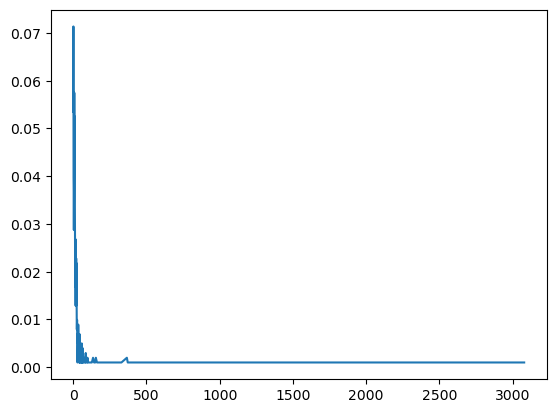

In [38]:
(predictions["diff"].round().value_counts().sort_index() / predictions.shape[0]).plot()

In [39]:
predictions

,actual,prediction,diff
Date,,,
2020-12-26,0.26,2.527077,2.267077
2020-12-27,0.26,8.020611,7.760611
2020-12-28,0.26,8.064378,7.804378
2020-12-29,0.26,8.017865,7.757865
2020-12-30,0.26,11.016659,10.756659
...,...,...,...
2023-09-26,30.69,8.160213,22.529787
2023-09-27,30.69,8.115261,22.574739
2023-09-28,30.69,8.669539,22.020461
